# **Описание проекта**

Вы аналитик российской авиакомпании F9, выполняющей внутренние пассажирские перевозки. Важно понять предпочтения пользователей, покупающих билеты на разные направления.

Вам предстоит изучить базу данных и проанализировать спрос пассажиров на рейсы в города, где проходят крупнейшие культурные фестивали.

## **Описание данных**

Имеются файлы, в которых содержатся результаты запросов из предыдущих заданий.

**query_1.csv** — результат первого запроса. В нём содержится такая информация:

- *model* — **модель самолета;
- *flights_amount* — количество рейсов для каждой модели самолетов *model* в сентябре 2018 года.

**query_3.csv** — результат третьего запроса. В нём содержится такая информация:

- *city* — город;
- *average_flights* — среднее количество рейсов, прибывающих в город (*city*) за день в сентябре 2018 года.

**query_last.csv** — результат последнего запроса. В нём следующая информация:

- *week_number* — **номер недели;
- *ticket_amount* — количество проданных билетов за неделю;
- *festival_week —* есть ли на этой неделе фестиваль;
- *festival_name —* название фестиваля.

## **Инструкция по выполнению проекта**

### **Шаг 1. Аналитика средствами Python**

 Для этих первых двух наборов данных нужно:

- импортировать файлы;
- изучить данные в них;
- проверить типы данных на корректность;
- выбрать топ-10 городов по количеству рейсов;
- построить графики: модели самолётов и количество рейсов, города и количество рейсов, топ-10 городов и количество рейсов;
- сделать выводы по каждому из графиков, пояснить результат.

### **Шаг 2.  Проверка гипотезы средствами Python**

Требуется проверить гипотезу: «Средний спрос на билеты во время фестивалей не отличается от среднего спроса на билеты в обычное время».

В качестве данных используется результат последнего запроса.

Пороговое значение *alpha* задаётся самостоятельно.

Необходимо пояснить:

- Как были сформулированы нулевая и альтернативная гипотезы;
- Какой критерий использовался для проверки гипотез и почему.

# **Импорт библиотек и зависимостей**

In [ ]:
!pip install plotly

Захотелось попробовать данную библиотеку, данных вроде не очень много, надеюсь обойдётся без тормозов.

In [ ]:
# Import Plotly.
import plotly
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots

In [ ]:
# Libraries import.
import random
import warnings
warnings.filterwarnings('ignore')

import re
import math
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats as st

# **1. Подготовка и анализ данных**

## **1.1 Импорт данных**

In [ ]:
# Data import.
try:
    airplanes = pd.read_csv('/datasets/query_1.csv')
    cities = pd.read_csv('/datasets/query_1.csv')
    festivales = pd.read_csv('/datasets/query_1.csv')
except:
    airplanes = pd.read_csv('/content/drive/My Drive/Colab Notebooks/flights/query_1.csv')
    cities = pd.read_csv('/content/drive/My Drive/Colab Notebooks/flights/query_3.csv')
    festivales = pd.read_csv('/content/drive/My Drive/Colab Notebooks/flights/query_last.csv')

In [ ]:
# Data view.
airplanes.head(10)

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


In [ ]:
cities.head(10)

,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613
5,Барнаул,2.612903
6,Белгород,6.000000
7,Белоярский,2.000000
8,Благовещенск,1.000000
9,Братск,1.000000


In [ ]:
festivales.head(10)

,week_number,ticket_amount,festival_week,festival_name
0,30,43568,30.0,Park Live
1,31,51034,31.0,Пикник Афиши
2,32,51675,NaN,NaN
3,33,51378,NaN,NaN
4,34,51492,NaN,NaN
5,35,51360,NaN,NaN
6,36,51386,36.0,Видфест
7,37,51670,NaN,NaN
8,38,51518,NaN,NaN
9,39,51623,NaN,NaN


## **1.2 Явные дубликаты**

In [ ]:
for data, name in zip([airplanes, cities, festivales], ['airplanes', 'cities', 'festivales']):
    print(name)
    print('Явных дубликатов в выборке: {}'.format(data.duplicated().sum()))
    print()

airplanes
Явных дубликатов в выборке: 0

cities
Явных дубликатов в выборке: 0

festivales
Явных дубликатов в выборке: 0



## **1.3 Общая информация**

In [ ]:
for data, name in zip([airplanes, cities, festivales], ['airplanes', 'cities', 'festivales']):
    print(name)
    print(data.info())
    print()
    print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
    print()

del data, name

airplanes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   model           8 non-null      object
 1   flights_amount  8 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes
None

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

cities
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   city             101 non-null    object 
 1   average_flights  101 non-null    float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB
None

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

festivales
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   week_

В таблице festivales присутствуют пропуски. Пропуски соответствуют неделям без праздников и фестивалей.

В целом можно отметить, что данных немного.

## **1.4 Анализ данных**

In [ ]:
def float_data_analyzer(data, columns, bins, round_lim):
    '''This function print and plot distribution of float-columns from inputing data.
        Input:
        data — the intrested data (DataFrame),
        columns — list of intrested columns from data,
        bins — number of bins for hist,
        round_lim — precision of describtion-rounding.

        Output:
        stat-describtion, boxplot and hist for each column.'''

    for column in columns:
        print(data[column].describe().round(round_lim))
        fig, ax = plt.subplots(1, 2, figsize=(12, 5))
        ax[0].set_title(f'Диаграмма размаха {column}')
        sns.boxplot(y=column, data=data, ax=ax[0], palette='Blues')
        sns.distplot(data[column], bins=bins, color='indigo', ax=ax[1])
        ax[1].set_title(f'Распределение {column}')
        plt.show()

### **1.4.1 Airplanes**

In [ ]:
# Airplanes statistics.
airplanes.describe().round(3)

,flights_amount
count,8.000
mean,2035.625
std,1965.204
min,300.000
25%,605.250
50%,795.000
75%,4250.250
max,4557.000


In [ ]:
def model_grouping(row):
    '''This function split airplanes by groups. '''

    for elem in row:
        elem = row.split(' ')
        if 'Boeing' in elem:
            return 'Boeing'
        elif 'Airbus' in elem:
            return 'Airbus'
        else:
             return 'other'

In [ ]:
# Group-info extracting.
airplanes['group'] = airplanes['model'].apply(model_grouping)

In [ ]:
airplanes

,model,flights_amount,group
0,Airbus A319-100,607,Airbus
1,Airbus A321-200,960,Airbus
2,Boeing 737-300,630,Boeing
3,Boeing 767-300,600,Boeing
4,Boeing 777-300,300,Boeing
5,Bombardier CRJ-200,4446,other
6,Cessna 208 Caravan,4557,other
7,Sukhoi SuperJet-100,4185,other


In [ ]:
# Pie-subplots making.
fig = make_subplots(rows=1, cols=2,
                    specs=[[{'type':'domain'}, {'type':'domain'}]],
                    subplot_titles=['Моделям', 'Семействам'])

# Models.
fig.add_trace(go.Pie(values=airplanes['flights_amount'],
                    labels=airplanes['model'],
                    marker=dict(colors=px.colors.sequential.BuPu_r)),
                    row=1, col=1)

# Groups.
fig.add_trace(go.Pie(values=airplanes['flights_amount'],
                     labels=airplanes['group'],
                     marker=dict(colors=px.colors.diverging.PRGn)),
                     row=1, col=2)

# Title.
fig.update_layout(title='Распределение рейсов за сентябрь 2018 год по:')
fig.show()

In [ ]:
print('Общее количество рейсов: {}'.format(airplanes['flights_amount'].sum()))
print('Среднее количество рейсов в день: {}'.format(airplanes['flights_amount'].sum() / 30))

Общее количество рейсов: 16285
Среднее количество рейсов в день: 542.8333333333334


Самыми популярными моделями являются Cessna 208 Caravan, Bombardier CRJ-200 и Sukhoi SuperJet-100 ненамного отстают. Доля рейсов на каждой из этих моделей превышает общую долю рейсов на Boeing и Airbus.

В среднем в сентябре 2018 года на самолётах компании F9 ежедневно совершалось 542 рейса.

Согласно дополнительным источникам ([1](https://ru.wikipedia.org/wiki/Cessna_208), [2](https://ru.wikipedia.org/wiki/Sukhoi_Superjet_100), [3](https://ru.wikipedia.org/wiki/Bombardier_CRJ200), [4](https://ru.wikipedia.org/wiki/Boeing_777), [5](https://ru.wikipedia.org/wiki/Boeing_767), [6](https://ru.wikipedia.org/wiki/Boeing_737), [7](https://ru.wikipedia.org/wiki/Airbus_A320)) таблицу можно дополнить данными о максимальном количестве пассажиров для каждой модели.

In [ ]:
def seats_filling(row):
    '''This function add info about seats for each model. '''

    if row == 'Boeing 737-300':
        return 149
    elif row == 'Boeing 767-300':
        return 375
    elif row == 'Boeing 777-300':
        return 550
    elif row == 'Airbus A319-100':
        return 116
    elif row == 'Airbus A321-200':
        return 180
    elif row == 'Bombardier CRJ-200':
        return 50
    elif row == 'Cessna 208 Caravan':
        return 13
    elif row == 'Sukhoi SuperJet-100':
        return 98

In [ ]:
# Group-info extracting.
airplanes['seats'] = airplanes['model'].apply(seats_filling)

In [ ]:
airplanes

,model,flights_amount,group,seats
0,Airbus A319-100,607,Airbus,116
1,Airbus A321-200,960,Airbus,180
2,Boeing 737-300,630,Boeing,149
3,Boeing 767-300,600,Boeing,375
4,Boeing 777-300,300,Boeing,550
5,Bombardier CRJ-200,4446,other,50
6,Cessna 208 Caravan,4557,other,13
7,Sukhoi SuperJet-100,4185,other,98


In [ ]:
fig = px.scatter(airplanes,
                 x='seats',
                 y='flights_amount',
                 color='model',
                 color_discrete_sequence=px.colors.sequential.Inferno,
                 title='Диаграмма рассеяния количества рейсов и посадочных мест для каждой модели')
fig.show()

Как видно из полученной диаграммы, наиболее часто летают модели с небольшим количеством пассажиров, а реже всего титаны-боинги, вмещающие сразу по несколько сотен человек.

Также можно выделить среднюю группу, в которую входят Суперджет, Airbus A319 и A320, а также Boeing 737. Суперджет имеет многократное превосходство по количеству проведённых рейсов среди самолётов с сопоставимым количеством посадочных мест. Это может быть связано с несколькими факторами:

1.   Суперджет является отечественной разработкой, обслуживание и приобретение этих моделей является более экономически выгодным;
2.   Суперджеты являются более новым молодым семейством. Вероятно заказчик проводит/провёл обновление тех.парка.
3. Количество рейсов связано с количеством экземпляров моделей, имеющихся у заказчика. В исходном запросе такова информация отсутсвует.



Предлагается приближённо оценить эффективность перевозок для каждой модели самолётов. Для этого предлагается рассчитать количество перевезённых за месяц людей при заданных коэффициентах заполнения самолётов. Тогда при приблизительно одинаковой стоимости билета на каждую модель самолёта самой эффективной окажется та модель, для которой количество перевезённых оказалось наибольшим.

In [ ]:
# Calculating the count of transported people if filling coef. is in np.arange(0.1, 1.1, 0.1).
air_fill_stats = pd.DataFrame()

for fill_factor in np.arange(0.1, 1.1, 0.1):
    air_fill_stats['{:.0%}'.format(fill_factor)] = \
    airplanes['flights_amount'] * ((airplanes['seats'] * fill_factor).apply(math.floor))

In [ ]:
airplanes

,model,flights_amount,group,seats
0,Airbus A319-100,607,Airbus,116
1,Airbus A321-200,960,Airbus,180
2,Boeing 737-300,630,Boeing,149
3,Boeing 767-300,600,Boeing,375
4,Boeing 777-300,300,Boeing,550
5,Bombardier CRJ-200,4446,other,50
6,Cessna 208 Caravan,4557,other,13
7,Sukhoi SuperJet-100,4185,other,98


In [ ]:
# Some transponse for plots.
air_fill_stats = air_fill_stats.transpose()
air_fill_stats.columns = airplanes['model'].values
air_fill_stats.sort_values('100%', axis=1, inplace=True)

In [ ]:
air_fill_stats

,Cessna 208 Caravan,Airbus A319-100,Boeing 737-300,Boeing 777-300,Airbus A321-200,Bombardier CRJ-200,Boeing 767-300,Sukhoi SuperJet-100
10%,4557,6677,8820,16500,17280,22230,22200,37665
20%,9114,13961,18270,33000,34560,44460,45000,79515
30%,13671,20638,27720,49500,51840,66690,67200,121365
40%,22785,27922,37170,66000,69120,88920,90000,163215
50%,27342,35206,46620,82500,86400,111150,112200,205065
60%,31899,41883,56070,99000,103680,133380,135000,242730
70%,41013,49167,65520,115500,120960,155610,157200,284580
80%,45570,55844,74970,132000,138240,177840,180000,326430
90%,50127,63128,84420,148500,155520,200070,202200,368280
100%,59241,70412,93870,165000,172800,222300,225000,410130


In [ ]:
# Filling plot-stats.
fig = go.Figure()

# Set colors.
colors = ['OrangeRed', 'Orange', 'YellowGreen', 'ForestGreen', 'RoyalBlue', 'DarkBlue', 'MediumPurple', 'FireBrick']

for model, color in zip(air_fill_stats.columns, colors):
    fig.add_trace(go.Scatter(x=air_fill_stats.index,
                            y=air_fill_stats[model],
                            mode='lines+markers',
                            name=model,
                            marker=dict(color=color)))

fig.update_layout(title='Сравнительная эффективность различных моделей в зависимости от коэффициента заполняемости',
                  yaxis_title='transported_amount',
                  xaxis_title='fill_coef')
fig.show()

Количество рейсов на Cessna 208 Caravan велико, но даже с учётом этого общее количество перевезённых пассажиров оказывается наименьшим. Если бы билеты стоили одинаково для всех моделей, то полёты на маломестных самолётов имели бы мало смысла.

Однако данный график даёт возможность сравнить различные модели по количеству перевезённых людей. Видно, что при текущей задействованности Boeing 767-300 переносит перевозит почти столько же людей, сколько и Bombardier CRJ-200, хотя даные самолёты из разных "весовых категорий".

Большая часть пассажиров доставляется с помощью Superjet, Boeing 767 и Bombardier CRJ-200.

### **1.4.2 Cities**

count    101.000
mean       5.494
std       13.120
min        1.000
25%        2.000
50%        3.000
75%        5.871
max      129.774
Name: average_flights, dtype: float64


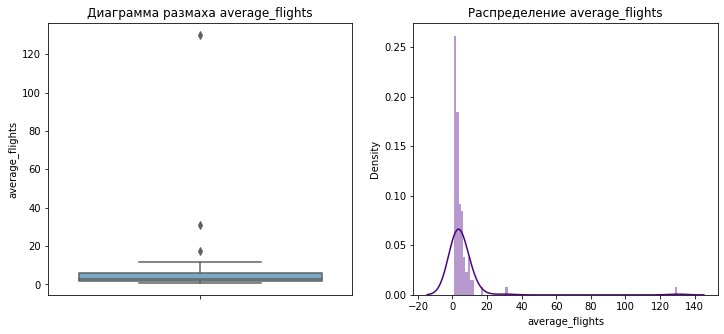

In [ ]:
# Cities statistics.
float_data_analyzer(cities, ['average_flights'], 100, 3)

Среднее значение 'average_flights' по всем городам близко к медианному значению.

Минимальное значение — единица — сильно отличается от максимального, приблизительно равного 130. В результате стандартное отклонение больше среднего значения на порядок.

Основная масса объектов находится в диапазоне от 0 до 8 рейсов.

count    87.000
mean      3.101
std       1.747
min       1.000
25%       1.804
50%       2.742
75%       4.065
max       7.742
Name: average_flights, dtype: float64


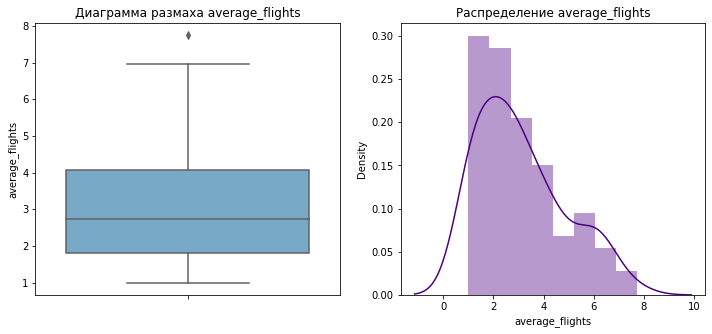

In [ ]:
# Kernel of objects.
float_data_analyzer(cities[cities['average_flights'] < 8],
                    ['average_flights'],
                    8,
                    3)

In [ ]:
# Top-10 popular city.
cities.sort_values('average_flights', ascending=False).head(10)

,city,average_flights
43,Москва,129.774194
70,Санкт-Петербург,31.161290
54,Новосибирск,17.322581
33,Красноярск,11.580645
20,Екатеринбург,11.322581
67,Ростов-на-Дону,10.193548
63,Пермь,10.129032
10,Брянск,10.000000
74,Сочи,9.612903
84,Ульяновск,9.580645


In [ ]:
# Top-10 bar.
fig = px.bar(cities.sort_values('average_flights', ascending=False).head(10),
             x="city",
             y="average_flights",
             color="city",
             color_discrete_sequence=px.colors.sequential.Inferno_r,
             title="Топ-10 самых популярных пунктов назначения")
fig.show()

In [ ]:
# Common bar.
fig = px.bar(cities.sort_values('average_flights', ascending=False),
             x="city",
             y="average_flights",
             color="city",
             color_discrete_sequence=px.colors.sequential.Inferno_r,
             title="График популярности различных пунктов назначения")
fig.show()

Интересно, что Казань значительно отстоит от Екатеринбурга (7,7 против 11,3), хотя города сопоставимы по размерам и численности. Вероятно это связано с географическим положением, из западной части РФ до Екб быстрее добираться на самолёте. Пермь, занимающая промежуточное географическое положение между вышеназванными городами, имеет показатель 10,1. Однако Ульяновск, находящийся почти на одной долготе с Казанью, имеет показатель 9,58, следовательно имеются и иные факторы влияния, не связанные с географическим положением.

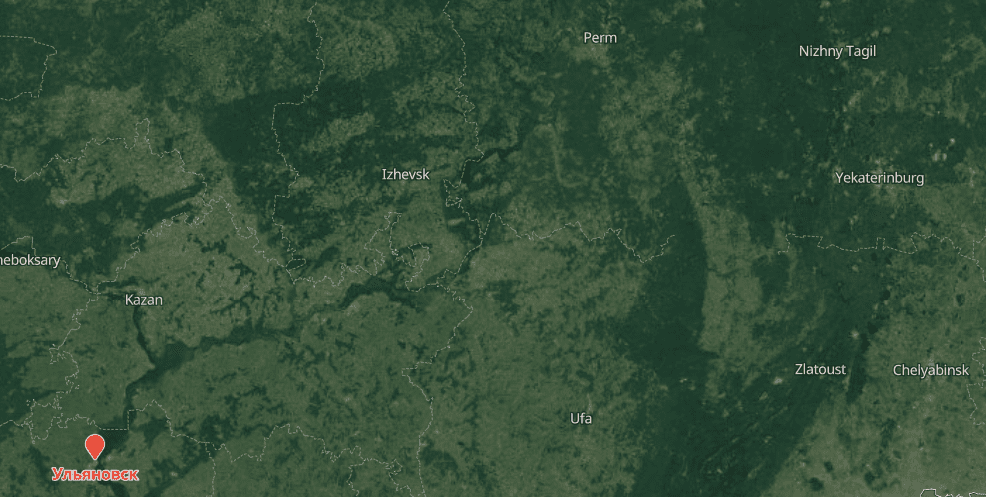

Самыми популярными пунктами назначения являются Москва и Санкт-Петербург (какая неожиданность:).

In [ ]:
# Home region.
cities[(cities['city'] == 'Сыктывкар') |
       (cities['city'] == 'Ухта')]

,city,average_flights
78,Сыктывкар,4.129032
90,Ухта,3.000000


### **1.4.3 Festivales**

In [ ]:
festivales

,week_number,ticket_amount,festival_week,festival_name
0,30,43568,30.0,Park Live
1,31,51034,31.0,Пикник Афиши
2,32,51675,NaN,NaN
3,33,51378,NaN,NaN
4,34,51492,NaN,NaN
5,35,51360,NaN,NaN
6,36,51386,36.0,Видфест
7,37,51670,NaN,NaN
8,38,51518,NaN,NaN
9,39,51623,NaN,NaN


Предлагается заменить пропуски:
- festival_week: 0;
- festival_name: '-'.

In [ ]:
# Filling nans.
festivales['festival_week'] = festivales['festival_week'].fillna(0)
festivales['festival_name'] = festivales['festival_name'].fillna('-')
festivales

,week_number,ticket_amount,festival_week,festival_name
0,30,43568,30.0,Park Live
1,31,51034,31.0,Пикник Афиши
2,32,51675,0.0,-
3,33,51378,0.0,-
4,34,51492,0.0,-
5,35,51360,0.0,-
6,36,51386,36.0,Видфест
7,37,51670,0.0,-
8,38,51518,0.0,-
9,39,51623,0.0,-


In [ ]:
# Add 'is_fest'.
festivales['is_fest'] = festivales['festival_week'].where(festivales['festival_week'] == 0, 1)
festivales

,week_number,ticket_amount,festival_week,festival_name,is_fest
0,30,43568,30.0,Park Live,1.0
1,31,51034,31.0,Пикник Афиши,1.0
2,32,51675,0.0,-,0.0
3,33,51378,0.0,-,0.0
4,34,51492,0.0,-,0.0
5,35,51360,0.0,-,0.0
6,36,51386,36.0,Видфест,1.0
7,37,51670,0.0,-,0.0
8,38,51518,0.0,-,0.0
9,39,51623,0.0,-,0.0


count       10.00
mean     50670.40
std       2502.75
min      43568.00
25%      51364.50
50%      51439.00
75%      51596.75
max      51675.00
Name: ticket_amount, dtype: float64


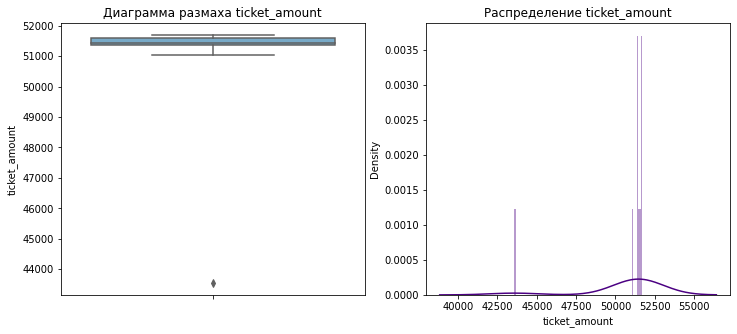

In [ ]:
# Festivales statistics.
float_data_analyzer(festivales, ['ticket_amount'], 100, 2)

В целом количество приобретённых билетов за выбранный отрезок времени находилось в интервале от 50 до 52 тысяч, 43,5 тысяч во время Park Live выглядят аномалией.

Поиск [дополнительной информации](https://iz.ru/771978/2018-07-29/gorillaz-obratilis-k-fanatam-posle-sryva-kontcerta-v-moskve) показал, что во время данного мероприятия случилось следующее происшествие: один из хедлайнеров не смог выступить вследствие штормовой погоды. Возможно из-за прогнозов синоптиков кто-то сознательно отказался от полётов в ту неделю, а возможно были задержаны рейсы.

Однако разница относительно основной группы видится значительной.

In [ ]:
# TimeSeries of ticket-buying.
fig = go.Figure()

# Line.
fig.add_trace(go.Scatter(x=festivales['week_number'],
                         y=festivales['ticket_amount'],
                         mode='lines',
                         name='Dynamic',
                         marker=dict(color='greenyellow')))

# Fest-markers.
fig.add_trace(go.Scatter(x=festivales[festivales['is_fest'] == 1]['week_number'],
                         y=festivales[festivales['is_fest'] == 1]['ticket_amount'],
                         mode='markers',
                         name='Fest',
                         marker=dict(color='orangered')))

# Usual-markers.
fig.add_trace(go.Scatter(x=festivales[festivales['is_fest'] == 0]['week_number'],
                         y=festivales[festivales['is_fest'] == 0]['ticket_amount'],
                         mode='markers',
                         name='Usual',
                         marker=dict(color='indigo')))

# Title & axes.
fig.update_layout(title="Динамика недельных покупок билетов: 23.07.18 — 30.09.18",
                  yaxis_title='ticket_amount',
                  xaxis_title='week_number')
fig.show()

Как видно из графика, первая точка, соответствующая фестивалю Park Live, значительно отстоит от остальных. Точка соответствующая Видфесту ничем не отличается от соседних (кроме цвета), что говорит о том, что это событие слабо связано с покупками билетов.

## **Вывод по этапу**

После анализа имеющихся данных получены следующие выводы:
- Большая часть рейсов, по данным заказчика, приходится на небольшие самолёты;
- Большая часть пассажиров доставляется с помощью Superjet, Boeing 767 и Bombardier CRJ-200;
- Самыми популярными пунктами назначения являются Москва и Санкт-Петербург;
- Количество билетов проданное во время проведения фестиваля Park Live сильно отличается от продаж за другие недели;
- Количество билетов проданное во время проведения фестиваля Park Live е сильно отличается от продаж за соседние недели.

Также стоит отметить, что данных для анализа немного (10 объектов: 3 фестивальных недели и 7 обычных), это определяет методику проверки гипотез.


# **2. Проверка гипотезы**

Требуется проверить гипотезу:
- «Средний спрос на билеты во время фестивалей не отличается от среднего спроса на билеты в обычное время».

## **2.1 Теоретические обоснования**

Проверить гипотезу о равенстве средних значений двух выборок можно с помощью теста Стьюдента.

Тест Стьюдента предполагает, что выборки имеют нормальное распределение. Для независимых выборок также требуется условие [равенства дисперсий](https://ru.wikipedia.org/wiki/T-%D0%BA%D1%80%D0%B8%D1%82%D0%B5%D1%80%D0%B8%D0%B9_%D0%A1%D1%82%D1%8C%D1%8E%D0%B4%D0%B5%D0%BD%D1%82%D0%B0#%D0%A2%D1%80%D0%B5%D0%B1%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D1%8F_%D0%BA_%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D0%BC).

Дисперсии генеральных выборок неизвестны, доступны только выборочные дисперсии.

Таким образом требуется оценить распределения выборок, а также их дисперсии.

Для оценки нормальности распределения предлагается использовать тест Шапиро-Уилка. Критическим уровнем значимости для теста на нормальность предлагается взять значение alpha = 0.05.
- **$H_0$**: Распределение похоже на нормальное, не удалось отвергнуть нулевую гипотезу;
- **$H_1$**: Распределение не похоже на нормальное, нулевую гипотезу стоит отвергнуть.

In [ ]:
# Distribution test for normality.
def shapiro_test(data):
    alpha = 0.05
    stat, p = st.shapiro(data)
    print('p-value:', p)
    if p > alpha:
        print('Распределение похоже на нормальное, не удалось отвергнуть нулевую гипотезу')
    else:
        print('Распределение не похоже на нормальное, нулевую гипотезу стоит отвергнуть')

In [ ]:
# Split festivales.
fest_set = festivales[festivales['is_fest'] == 1]
usual_set = festivales[festivales['is_fest'] == 0]

In [ ]:
fest_set

,week_number,ticket_amount,festival_week,festival_name,is_fest
0,30,43568,30.0,Park Live,1.0
1,31,51034,31.0,Пикник Афиши,1.0
6,36,51386,36.0,Видфест,1.0


In [ ]:
usual_set

,week_number,ticket_amount,festival_week,festival_name,is_fest
2,32,51675,0.0,-,0.0
3,33,51378,0.0,-,0.0
4,34,51492,0.0,-,0.0
5,35,51360,0.0,-,0.0
7,37,51670,0.0,-,0.0
8,38,51518,0.0,-,0.0
9,39,51623,0.0,-,0.0


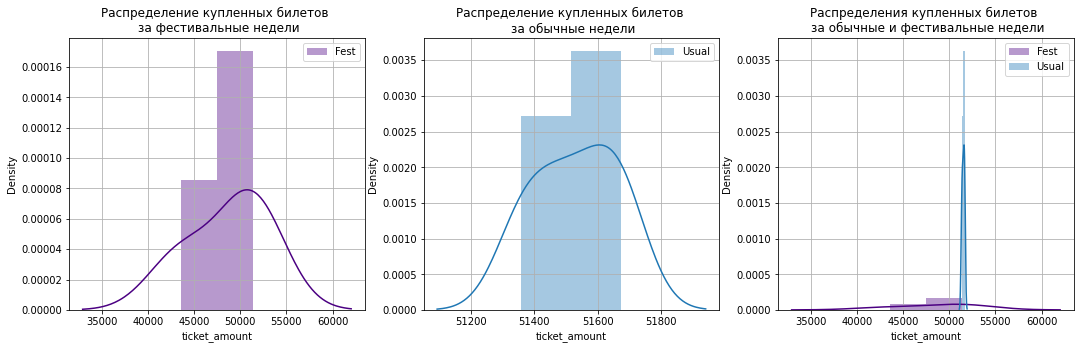

In [ ]:
# Distributions.
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))

# Fest.
sns.distplot(fest_set['ticket_amount'], ax=ax[0], color='indigo', label='Fest')
ax[0].set_title('Распределение купленных билетов \n за фестивальные недели')
ax[0].grid()
ax[0].legend()

# Usual.
sns.distplot(usual_set['ticket_amount'], ax=ax[1], label='Usual')
ax[1].set_title('Распределение купленных билетов \n за обычные недели')
ax[1].grid()
ax[1].legend()

# Common.
sns.distplot(fest_set['ticket_amount'], ax=ax[2], color='indigo', label='Fest')
sns.distplot(usual_set['ticket_amount'], ax=ax[2], label='Usual')
ax[2].set_title('Распределения купленных билетов \n за обычные и фестивальные недели')
ax[2].grid()
ax[2].legend()

plt.show()

In [ ]:
shapiro_test(fest_set['ticket_amount'])

p-value: 0.07614270597696304
Распределение похоже на нормальное, не удалось отвергнуть нулевую гипотезу


In [ ]:
shapiro_test(usual_set['ticket_amount'])

p-value: 0.29630061984062195
Распределение похоже на нормальное, не удалось отвергнуть нулевую гипотезу


Тесты показали, что обе выборки могут иметь нормальное распределение. Однако малое количество данных не позволяет однозначно довериться данному результату.

In [ ]:
for data, name in zip([fest_set['ticket_amount'], usual_set['ticket_amount']], ['Fest', 'Usual']):
    print(name)
    print(round(data.var(ddof=1), 3))
    print(data.describe().round(3))
    print()
    print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
    print()

Fest
19497697.333
count        3.000
mean     48662.667
std       4415.620
min      43568.000
25%      47301.000
50%      51034.000
75%      51210.000
max      51386.000
Name: ticket_amount, dtype: float64

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Usual
17143.476
count        7.000
mean     51530.857
std        130.933
min      51360.000
25%      51435.000
50%      51518.000
75%      51646.500
max      51675.000
Name: ticket_amount, dtype: float64

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~



Выборочные дисперсии (и стандартные отклоненения) отличаются на несколько порядков. Исходя из этого, а также из малого количества данных предлагается использовать для проверки гипотезы не тест Стьюдента, а непараметрический тест Уилкоксона-Манна-Уитни.

## **2.2 Тестирование**

Исходя из первоначальной формулировки задания были получены следующие нулевая и альтернативные гипотезы:
- **$H_0$**: $\mu_1 = \mu_2$;
- **$H_1$**: $\mu_1 \neq \mu_2$.

где:  
$\mu_1$ - среднее значение спроса на билеты (среднее количество проданных билетов) во время фестивалей,  
$\mu_2$ - среднее значение спроса на билеты (среднее количество проданных билетов) в обычное время.

Критическим уровнем значимости для теста на нормальность предлагается взять значение alpha = 0.05.

In [ ]:
# Equality test.
def U_test(set_1, set_2, alternative):
    '''This function make Mann-Whitney equality-test'''

    alpha = 0.05
    stat, p = st.mannwhitneyu(set_1, set_2, alternative=alternative)
    print('p-value:', p)
    if p > alpha:
        print('Не удалось отвергнуть нулевую гипотезу')
    else:
        print('Нулевую гипотезу стоит отвергнуть')

In [ ]:
U_test(fest_set['ticket_amount'], usual_set['ticket_amount'], 'two-sided')

p-value: 0.06824748837800128
Не удалось отвергнуть нулевую гипотезу


Тест показал, что нет оснований отвергать нулевую гипотезу, т.е. **вполне допустимо, что спрос на билеты не зависит от проведения фестивалей.**

Однако стоит учитывать, что данных очень мало. Для подобных исследований стоит брать данные за больший промежуток, либо с меньшими интервалами (закупки по дням).

Для сравнения предлагается всё же провести тест Стьюдента.

In [ ]:
# Equality test.
def student_test(set_1, set_2, equal_var):
    '''This function make Student equality-test'''

    alpha = 0.05
    stat, p = st.ttest_ind(set_1, set_2, equal_var=equal_var)
    print('p-value:', p)
    if p > alpha:
        print('Не удалось отвергнуть нулевую гипотезу')
    else:
        print('Нулевую гипотезу стоит отвергнуть')

In [ ]:
student_test(fest_set['ticket_amount'], usual_set['ticket_amount'], False)

p-value: 0.377432493172683
Не удалось отвергнуть нулевую гипотезу


Как и в случае U-теста нулевая гипотеза не была отвергнута. Однако достигнутый уровень значимости получился много большим.

## **Вывод по этапу**

Тестирование показало, что средний спрос на билеты во время фестивалей не отличается от среднего спроса на билеты в обычное время.

# **Вывод по проекту**

В рамках проекта было проведено исследование данных о воздушных перевозках:
- изучены объёмы перевозок с помощью различных моделей самолётов. Самый эффективный — Sukhoi SuperJet-100;
- определены наиболее популярные пункты назначения (Москва, Санкт-Петербург);
- проверена и признана непротиворечивой гипотеза о том, что фестивали не влияют количество покупаемых билетов.